Dataset shape: (9000, 10)
  Employee_ID  Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0       E1000   59       Sales                   27                    135   
1       E1001   49        Tech                   13                    132   
2       E1002   35  Operations                   16                    197   
3       E1003   28          HR                   23                    204   
4       E1004   41  Operations                   33                    192   

   Training_Hours_per_Year  Performance_Rating Job_Satisfaction_Level  \
0                       30                   3                 Medium   
1                       36                   5                 Medium   
2                       11                   5                    Low   
3                       36                   3                   High   
4                       36                   2                 Medium   

  Promotion_in_Last_2_Years Attrition  
0                       Ye

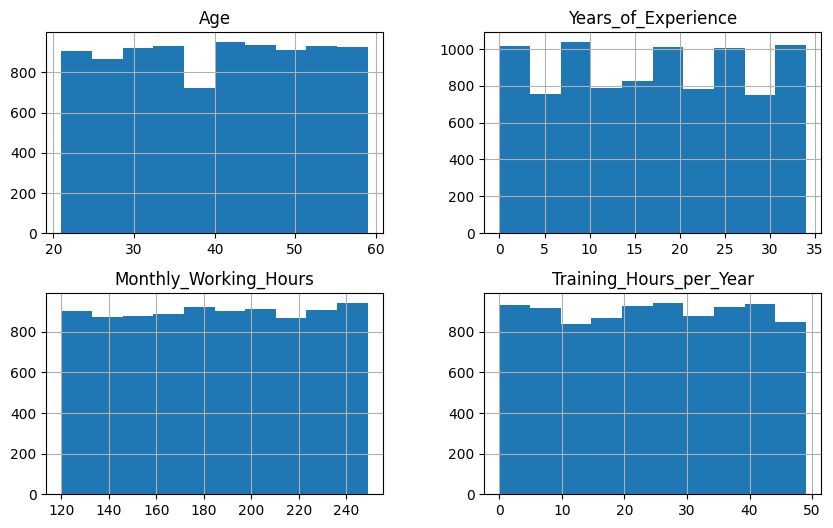

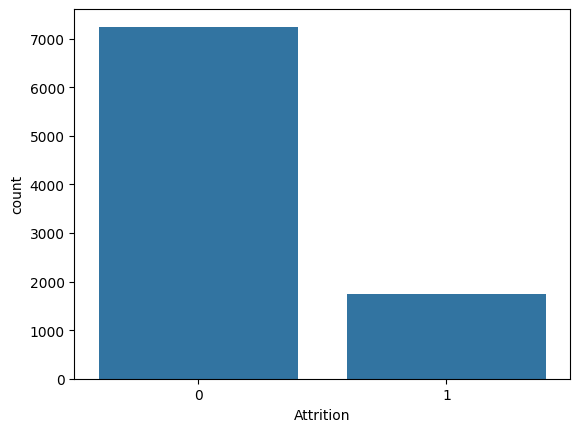

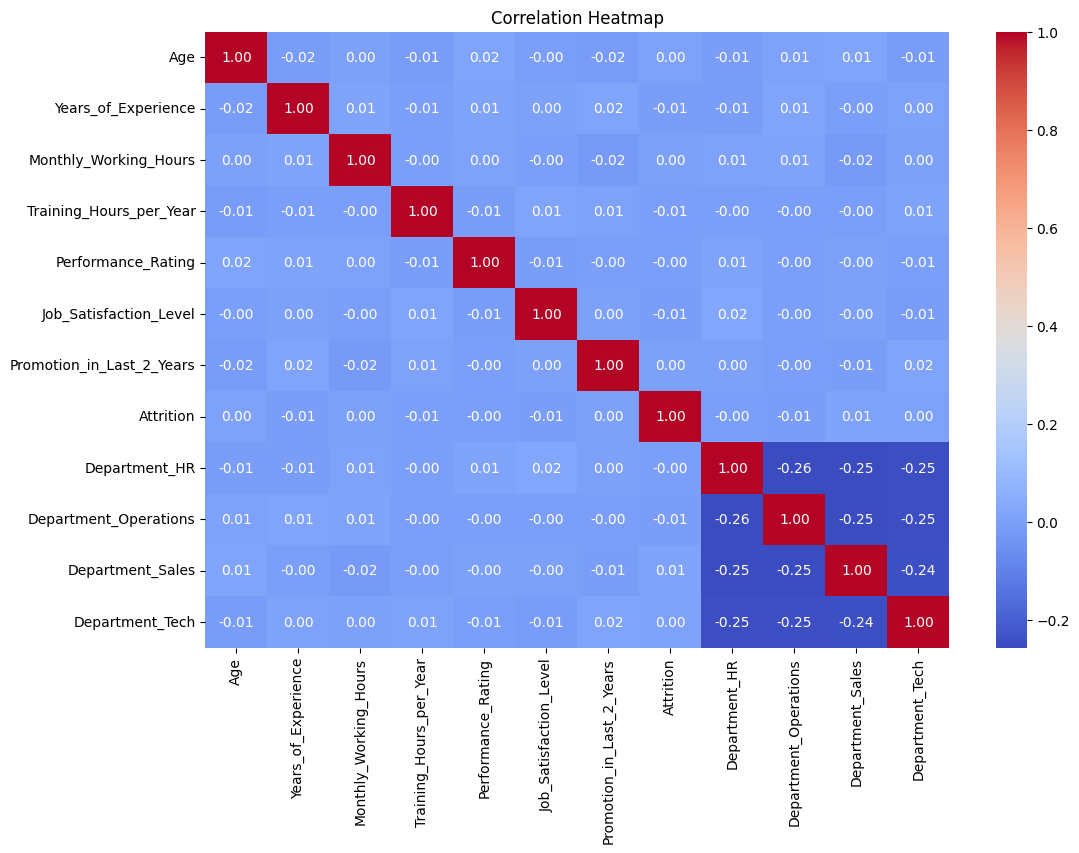

Accuracy: 0.8044444444444444
Precision: 0.4
Recall: 0.005698005698005698
F1 Score: 0.011235955056179775

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1449
           1       0.40      0.01      0.01       351

    accuracy                           0.80      1800
   macro avg       0.60      0.50      0.45      1800
weighted avg       0.73      0.80      0.72      1800



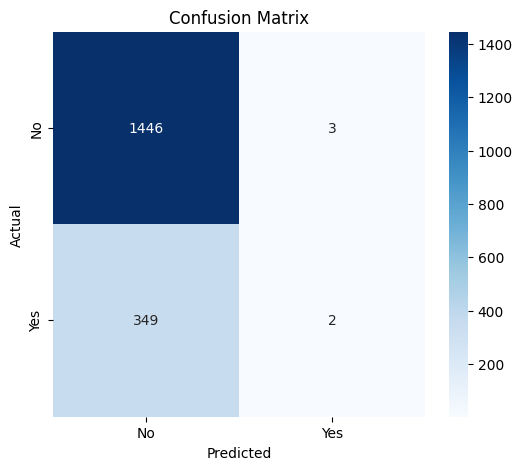

                      Feature  Importance
2       Monthly_Working_Hours    0.225971
3     Training_Hours_per_Year    0.196028
0                         Age    0.186547
1         Years_of_Experience    0.180316
4          Performance_Rating    0.073277
5      Job_Satisfaction_Level    0.047388
7               Department_HR    0.018801
10            Department_Tech    0.018728
6   Promotion_in_Last_2_Years    0.018122
8       Department_Operations    0.017806
9            Department_Sales    0.017016


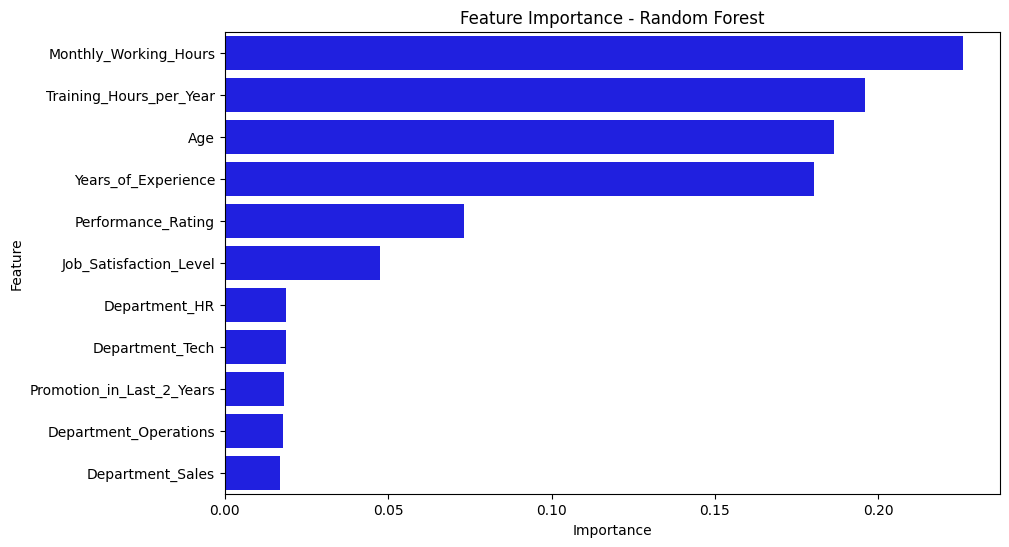

Model saved successfully!


In [32]:
# -------------------------------
# Employee Attrition Prediction - Complete Workflow (Clean Version)
# -------------------------------

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

# -------------------------------
# Step 2: Load Dataset
# -------------------------------
df = pd.read_csv("Employee_Performance_Retention.csv")  # change path if needed
print("Dataset shape:", df.shape)
print(df.head())

# -------------------------------
# Step 3: Data Cleaning
# -------------------------------
# Drop unnecessary column
if 'Employee_ID' in df.columns:
    df = df.drop(columns=['Employee_ID'])

# Remove duplicates
df = df.drop_duplicates()

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode (fixed FutureWarning)
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].fillna(df[c].mode()[0])

# Clean column names
df.columns = df.columns.str.strip()

# -------------------------------
# Step 4: Encode Categorical Variables
# -------------------------------
# Binary columns
df['Attrition'] = df['Attrition'].map({'No':0, 'Yes':1})
df['Promotion_in_Last_2_Years'] = df['Promotion_in_Last_2_Years'].map({'No':0, 'Yes':1})

# Ordinal column
df['Job_Satisfaction_Level'] = df['Job_Satisfaction_Level'].map({'Low':1, 'Medium':2, 'High':3})

# Nominal column → One-Hot Encoding
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# -------------------------------
# Step 5: Exploratory Data Analysis (Optional)
# -------------------------------
# Histograms for numeric columns
df[['Age','Years_of_Experience','Monthly_Working_Hours','Training_Hours_per_Year']].hist(figsize=(10,6))
plt.show()

# Countplot for Attrition
sns.countplot(x='Attrition', data=df)
plt.show()

# Correlation heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# Step 6: Define Features and Target
# -------------------------------
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# -------------------------------
# Step 7: Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# Step 8: Train Random Forest Classifier
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -------------------------------
# Step 9: Make Predictions and Evaluate
# -------------------------------
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# Step 10: Feature Importance
# -------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

# Barplot of feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances, color='blue')
plt.title("Feature Importance - Random Forest")
plt.show()

# -------------------------------
# Step 11: Save Cleaned Dataset and Model
# -------------------------------
# Save cleaned data
df.to_csv('employee_data_cleaned.csv', index=False)

# Save trained Random Forest model
joblib.dump(rf_model, "rf_attrition_model.pkl")
print("Model saved successfully!")












